In [1]:
from models.visualization.view_functions import *
import torch
import matplotlib.pyplot as plt
from PIL import Image
import imageio
import numpy as np

from fastai.vision.all import *
from fastai.distributed import *
from fastai.metrics import error_rate
from fastai.callback.tracker import SaveModelCallback
import argparse
from timeit import default_timer as timer

from torchvision import datasets, transforms, models
import torch.optim as optim
from torch.optim import lr_scheduler
import time
import os
import copy
import torchvision.transforms as T
import torch
from torchvision.transforms.functional import *

from PIL import Image
import requests
import imageio

import matplotlib.pyplot as plt
import numpy as np
import torch.nn.functional as F
from torch import nn

import ipywidgets as widgets
from IPython.display import display, clear_output
import math

from models.backbone import Backbone
from models.encoder import EncoderModule
from models.utils.joiner_v5 import *
from models.utils.new_losses import *
from models.utils.metrics import Accuracy
from models.unet import UNet
from models.utils.misc import *
from models.utils.datasets import *
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
from models.utils.ARViT2D import ARViT2D

In [2]:
url0 = 'https://ogden_images.s3.amazonaws.com/www.timesrepublican.com/images/2019/05/02231710/Fox-WEB-1100x739.jpg'
url1 = 'https://cms.qz.com/wp-content/uploads/2019/12/airplane-e1575485422322.jpg?quality=75&strip=all&w=1200&h=900&crop=1'
url2 = 'https://static.scientificamerican.com/sciam/cache/file/ACF0A7DC-14E3-4263-93F438F6DA8CE98A_source.jpg?w=590&h=800&896FA922-DF63-4289-86E2E0A5A8D76BE1'
url3 = 'https://media.allure.com/photos/596552d8c7982f5ec80b68e8/16:9/w_2560%2Cc_limit/GettyImages-124828421.jpg'
url4 = 'https://st2.depositphotos.com/1020917/7268/i/950/depositphotos_72688965-stock-photo-hms-victory.jpg'
url5 = 'https://www.sciencemag.org/sites/default/files/styles/article_main_large/public/elephant_1280p.jpg?itok=UT_i17Yh'
url6 = 'https://southernboating.com/wp-content/uploads/2019/11/New-running-530-0832-1024x600.jpg'

In [3]:
#model = run_load_model(3,False,True,"3",True)#.to(device)

In [3]:
def get_gm(r):
    label = parent_label(r)
    a = attrgetter("name")
    rgex = RegexLabeller(pat = r'image(.*?).jpeg') 
    gm = torch.load(save_path+"/gramm/"+str(label)+"/gm"+rgex(a(r))+".pt")
    return gm, TensorCategory(int(label))

In [4]:
# model = VisionTransformer2D(img_size=256, num_classes=4, embed_dim=516, depth=12,
#                  num_heads=12, mlp_ratio=4., qkv_bias=True, representation_size=None, distilled=False,
#                  drop_rate=0., attn_drop_rate=0., drop_path_rate=0., norm_layer=None,
#                  act_layer=None)

model_dir = Path.home()/'Luiz/saved_models/AROB'
net = load_learner(model_dir/'ARViT2D-Base-6L.pkl', cpu=False)
weights_dir = model_dir/'best/ARViT2D-L3.pth'
model = net.model
weights_dict = load_learner(weights_dir, cpu=False)
model.load_state_dict(weights_dict)
model = model.eval()

In [ ]:
model_dir = Path.home()/'Luiz/saved_models/AROB'
#net = load_learner(model_dir/'ARViT-L1-G32.pkl', cpu=False)
weights_dir = model_dir/'best/ARViT2D-Base.pth'
#model = net.model
model.load_state_dict(torch.load(weights_dir))
#model.load_state_dict(weights_dir)
model = model.eval()

In [5]:
model = model.to(device)

In [7]:
base_net = load_learner(model_dir/'ARViT-Base.pkl', cpu=False)
base_weights_dir = model_dir/'best/ARViT-Base.pth'
base = base_net.model
#base_model.load_state_dict(best_weight)
base = base.eval()
#model = model.to(device)

FileNotFoundError: [Errno 2] No such file or directory: '/home/atsumilab/Luiz/saved_models/AROB/ARViT-Base.pkl'

In [27]:
view_sattn(model,url0,layer=2,color='viridis',div=10000)

FileNotFoundError: [Errno 2] No such file or directory: 'sample_images/imagehttps://ogden_images.s3.amazonaws.com/www.timesrepublican.com/images/2019/05/02231710/Fox-WEB-1100x739.jpg.jpeg'

In [7]:
maps, im = get_att_maps(model, 19)

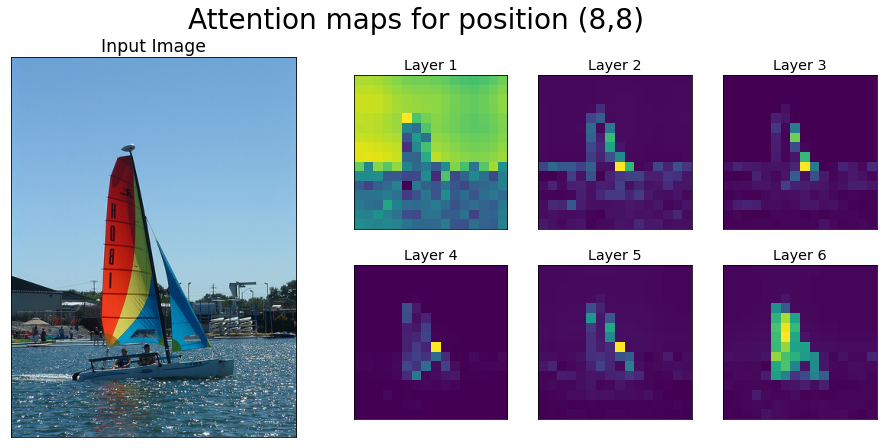

In [8]:
show_attention_maps(im,8,8,maps,color='viridis')

In [25]:
w = AttentionVisualizer(model, 0, img_url=url6, img_idx=17,color='cividis')
w.run()

In [ ]:
#plot_patch_gm(17,color='bone',color2='viridis')

In [ ]:
#plot3channels(17)

In [10]:
transform = T.Compose([
T.Resize((256,256)),
T.ToTensor()#,
#T.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

In [90]:
im = Image.open('sample_images/image'+str(19)+'.jpeg')
img = transform(im).unsqueeze(0).to(device)
#outputs, attn, sattn, gm  = model(img.to(device))
#sattn_map = sattn[4]

(-0.5, 255.5, 255.5, -0.5)

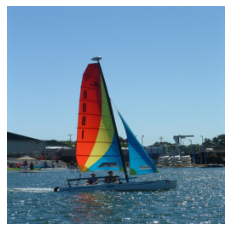

In [91]:
#im = Image.open(requests.get(url1, stream=True).raw)
#img = transform(im).unsqueeze(0).to(device)
outputs, attn, sattn, gm  = model(img.to(device))
plt.plot()
plt.imshow(img[0].cpu().permute(1, 2, 0))
plt.axis('off')

(-0.5, 255.5, 255.5, -0.5)

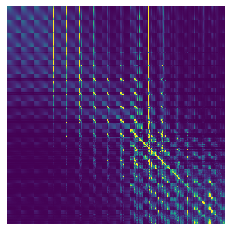

In [92]:
threshold = torch.sum(sattn[5][0])/7000
plt.plot()
plt.imshow(sattn[3][0].cpu().detach().numpy(),cmap='viridis', interpolation='nearest',vmax=threshold)
plt.axis('off')

(-0.5, 15.5, 15.5, -0.5)

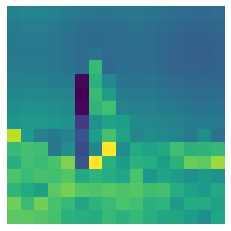

In [105]:
plt.plot()
plt.imshow(sattn[0][0][167].reshape(16,16).cpu().detach().numpy(),cmap='viridis', interpolation='nearest')#,vmax=threshold)
plt.axis('off')

In [13]:
sattn_map = attn[11]
threshold = torch.sum(sattn_map)/7000
fig, axs = plt.subplots(1, 2, figsize=(12,8))
axs[0].imshow(im)
axs[0].set_xticks([])
axs[0].set_yticks([])
axs[1].imshow(sattn_map[0].cpu().detach().numpy(),cmap='viridis', interpolation='nearest',vmax=threshold)
axs[1].set_xticks([])
axs[1].set_yticks([])
plt.show()

IndexError: list index out of range

In [ ]:
avgPool = nn.AvgPool2d(2, 2)

In [ ]:
plt.plot()
plt.imshow(sattn_map[0].cpu().detach().numpy(),cmap='viridis', interpolation='nearest',vmax=threshold)
plt.axis('off')

In [ ]:
op1 = sattn_map.reshape(1,256,16,16)
print(op1.shape)
plt.plot()
plt.imshow(op1[0][136].cpu().detach().numpy(),cmap='viridis', interpolation='nearest',vmax=threshold)
plt.axis('off')
#plt.set_xticks([])
#plt.set_yticks([])

In [ ]:
op2 = avgPool(op1)
print(op2.shape)
plt.plot()
plt.imshow(op2[0][136].cpu().detach().numpy(),cmap='viridis', interpolation='nearest',vmax=threshold)
plt.axis('off')

In [ ]:
op3 = op2.reshape(1,256,64)
print(op3.shape)
plt.plot()
plt.imshow(op3[0].cpu().detach().numpy(),cmap='viridis', interpolation='nearest',vmax=threshold)
plt.axis('off')

In [ ]:
op4 = op3.permute(0,2,1)
print(op4.shape)
plt.plot()
plt.imshow(op4[0].cpu().detach().numpy(),cmap='viridis', interpolation='nearest',vmax=threshold)
plt.axis('off')

In [ ]:
op5 = op4.reshape(1,64,16,16)
print(op5.shape)
plt.plot()
plt.imshow(op5[0][42].cpu().detach().numpy(),cmap='viridis', interpolation='nearest',vmax=threshold)
plt.axis('off')

In [ ]:
op6 = avgPool(op5)
print(op6.shape)
plt.plot()
plt.imshow(op6[0][42].cpu().detach().numpy(),cmap='viridis', interpolation='nearest',vmax=threshold)
plt.axis('off')

In [ ]:
op7 = op6.reshape(1,64,64)
print(op7.shape)
plt.plot()
plt.imshow(op7[0].cpu().detach().numpy(),cmap='viridis', interpolation='nearest',vmax=threshold)
plt.axis('off')

In [ ]:
op8 = op7.permute(0,2,1)
print(op8.shape)
plt.plot()
plt.imshow(op8[0].cpu().detach().numpy(),cmap='viridis', interpolation='nearest',vmax=threshold)
plt.axis('off')

In [ ]:
#import pylab as plt

from scipy.interpolate import RegularGridInterpolator

def regrid(data, out_x, out_y):
    m = max(data.shape[0], data.shape[1])
    y = np.linspace(0, 1.0/m, data.shape[0])
    x = np.linspace(0, 1.0/m, data.shape[1])
    interpolating_function = RegularGridInterpolator((y, x), data)

    yv, xv = np.meshgrid(np.linspace(0, 1.0/m, out_y), np.linspace(0, 1.0/m, out_x))

    return interpolating_function((xv, yv))

In [ ]:
im = Image.open('sample_images/image'+str(21)+'.jpeg')
img = transform(im).unsqueeze(0).to(device)
outputs, attn, sattn, gm  = model(img.to(device))
sattn_map = sattn[5]
op1 = sattn_map.reshape(1,256,16,16)
resized = regrid(op1[0][120].cpu().detach().numpy(),256,256)
#plt.imshow(resized,cmap='viridis', interpolation='nearest',vmax=threshold)
#plt.axis('off')

In [ ]:
threshold = torch.sum(sattn_map)/60000
dx, dy = 0.05, 0.05
x = np.arange(-3.0, 3.0, dx)
y = np.arange(-3.0, 3.0, dy)
X, Y = np.meshgrid(x, y)

extent = np.min(x), np.max(x), np.min(y), np.max(y)
fig = plt.figure(frameon=False)
im1 = plt.imshow(im, cmap=plt.cm.gray, interpolation='nearest',extent=extent)
im2 = plt.imshow(resized, cmap=plt.cm.viridis, alpha=.4, interpolation='bilinear',extent=extent,vmax=threshold)
plt.axis('off')
plt.show()

In [ ]:
threshold = torch.sum(sattn_map)/85000
outputs2, attn2, sattn2, gm2  = base(img.to(device))
sattn_map2 = sattn2[2]
op12 = sattn_map2.reshape(1,256,16,16)
resized2 = regrid(op12[0][120].cpu().detach().numpy(),256,256)
fig = plt.figure(frameon=False)
im1 = plt.imshow(im, cmap=plt.cm.gray, interpolation='nearest',extent=extent)
im2 = plt.imshow(resized2, cmap=plt.cm.viridis, alpha=.4, interpolation='bilinear',extent=extent, vmax=threshold)
plt.axis('off')
plt.show()

In [ ]:
plt.plot()
plt.imshow(img[0].permute(1, 2, 0).cpu().detach().numpy())
plt.axis('off')